In [2]:
import pandas as pd
import numpy as np
train=pd.read_csv("train.csv")
train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

In [0]:
#같은 feauture?
f_temp=train[['X00','X07','X28','X31','X32']] #기온
f_atmos=train[['X01','X06','X22','X27','X29']] #현지기압
f_wind=train[['X02','X03','X18','X24','X26']] #풍속
f_rain=train[['X04','X10','X21','X36','X39']] #일일누적강수량
f_sea=train[['X05','X08','X09','X23','X33']] #해면기압
f_solar=train[['X11','X14','X16','X19','X34']] #일일누적일사량
f_hum=train[['X12','X20','X30','X37','X38']] #습도
f_dir=train[['X13','X15','X17','X25','X35']] #풍향

In [5]:
f_temp.head()

,X00,X07,X28,X31,X32
0,9.7,12.2,12.3,8.2,10.7
1,9.3,12.1,12.1,8.3,10.3
2,9.4,12.1,12.1,8.0,9.7
3,9.4,12.0,12.1,7.7,9.4
4,9.2,12.0,12.0,7.4,9.4


In [0]:
#누적값 처리
f_solar_each=f_solar.diff().clip(lower=0)
f_rain_each=f_rain.diff().clip(lower=0)

In [7]:
f_solar_each.head()

,X11,X14,X16,X19,X34
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [8]:
f_rain_each.head()

,X04,X10,X21,X36,X39
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [0]:
#nan값 처리 
f_solar_each[np.isnan(f_solar_each)] = 0
f_rain_each[np.isnan(f_rain_each)] = 0

```python
#동일한 feature에 해당하는 col은 평균으로 처리 
train['temp'] = (train['X00']+train['X07']+train['X28']+train['X31']+train['X32'])/5  #기온
train['atmos'] = (train['X01']+train['X06']+train['X22']+train['X27']+train['X29'])/5 #현지기압
train['wind'] = (train['X02']+train['X03']+train['X18']+train['X24']+train['X26'])/5  #풍속
train['rain'] = (f_rain_each['X04']+f_rain_each['X10']+f_rain_each['X21']+f_rain_each['X36']+f_rain_each['X39'])/5  #일일누적강수량
train['sea'] = (train['X05']+train['X08']+train['X09']+train['X23']+train['X33'])/5   #해면기압
train['solar'] = (f_solar_each['X11']+f_solar_each['X24']+f_solar_each['X16']+f_solar_each['X19']+f_solar_each['X34'])/5 #일일누적일사량
train['hum'] = (train['X12']+train['X20']+train['X30']+train['X37']+train['X38'])/5   #습도
train['dir'] = (train['X13']+train['X15']+train['X17']+train['X25']+train['X35'])/5   #풍향
train.head(3) #8개
```

In [0]:
#전체 train 가져가는 경우 
train_all=pd.concat([f_solar_each,f_rain_each,f_temp, f_atmos, f_wind, f_sea, f_hum, f_dir],axis=1)

In [11]:
train_all.head(10) #40개 

,X11,X14,X16,X19,X34,X04,X10,X21,X36,X39,X00,X07,X28,X31,X32,X01,X06,X22,X27,X29,X02,X03,X18,X24,X26,X05,X08,X09,X23,X33,X12,X20,X30,X37,X38,X13,X15,X17,X25,X35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,1001.6,1.2,0.6,0.3,1.1,0.5,1009.3,1009.9,1009.8,1009.8,1010.1,82.4,91.0,69.1,77.2,62.6,71.3,101.1,56.1,2.3,256.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,1001.7,1.7,1.9,0.4,0.0,0.0,1009.3,1010.0,1009.9,1009.9,1010.1,81.2,91.9,70.3,77.3,63.5,121.8,165.3,0.0,0.0,215.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,1001.6,1.1,2.3,0.6,0.0,0.0,1009.2,1010.1,1010.1,1009.8,1010.0,86.1,93.3,71.5,77.3,63.9,232.0,144.0,0.0,0.0,235.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,1001.5,1.5,0.7,0.1,0.0,0.2,1009.2,1010.0,1010.0,1009.7,1010.1,87.7,93.4,73.2,77.5,64.5,0.0,115.9,294.1,0.0,214.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,1001.5,0.8,1.7,0.0,0.0,0.0,1009.2,1010.1,1010.0,1009.7,1010.1,88.9,94.1,74.3,78.0,65.0,0.0,124.7,0.0,0.0,174.9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1,12.0,12.0,7.3,9.1,988.9,989.6,1002.3,1008.7,1001.5,1.3,0.7,0.2,0.0,0.0,1009.1,1010.0,1010.0,1009.7,1010.1,90.7,94.6,75.7,78.7,65.1,222.0,174.2,0.0,0.0,243.1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1,12.0,11.8,7.1,8.6,988.8,989.6,1002.3,1008.7,1001.4,2.4,1.9,0.3,0.0,0.0,1009.1,1010.1,1010.0,1009.6,1010.1,90.2,94.9,79.0,78.6,65.5,257.8,168.9,0.0,0.0,195.8
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9,11.9,11.8,7.1,8.8,988.9,989.7,1002.4,1008.7,1001.5,1.0,1.2,0.4,0.0,0.0,1009.2,1010.1,1010.1,1009.7,1010.1,91.9,95.0,78.2,78.6,65.7,226.4,112.8,0.0,0.0,262.7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.9,11.6,7.0,8.8,988.9,989.6,1002.4,1008.7,1001.5,1.5,0.1,0.6,0.0,0.0,1009.2,1010.0,1010.1,1009.7,1010.1,92.2,95.5,77.5,78.8,66.5,215.0,157.4,0.0,0.0,236.1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,11.8,11.5,7.1,8.5,988.9,989.6,1002.5,1008.6,1001.5,1.4,0.4,0.6,0.0,0.0,1009.4,1010.1,1010.1,1009.7,1010.0,92.7,95.6,79.3,78.8,67.6,214.4,134.0,0.0,0.0,230.9


In [0]:
#다중공산성 


In [0]:
#30일 데이터로 먼저 학습 
X_train = train_all[:4320]
y_train = train[['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:4320]

In [13]:
y_train.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5


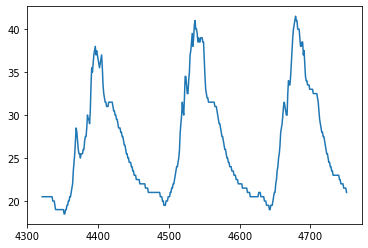

In [14]:
#target : Y18 
import matplotlib.pyplot as plt
plt.plot(train['Y18'][4321:])
plt.show()

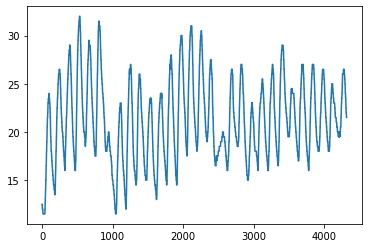

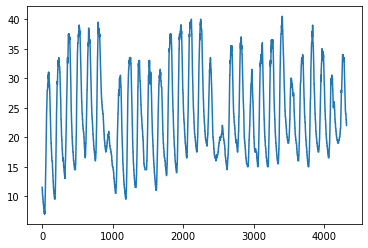

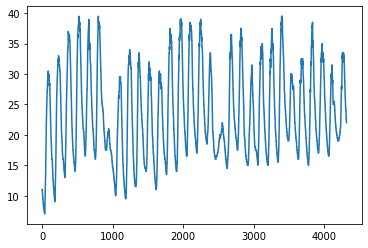

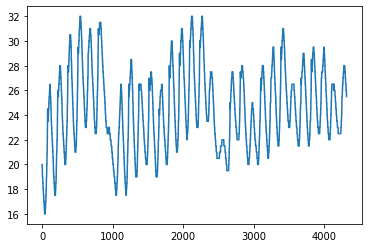

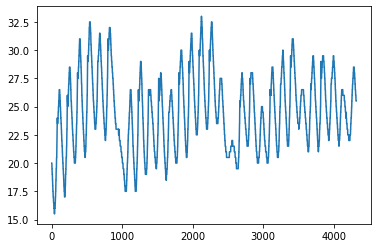

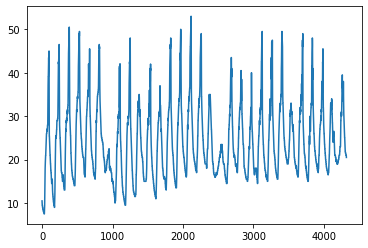

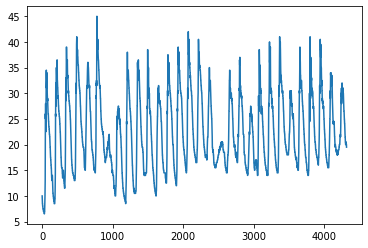

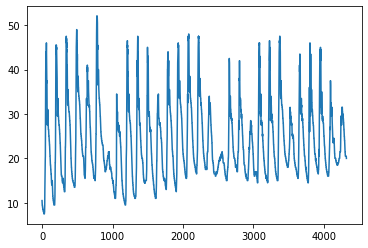

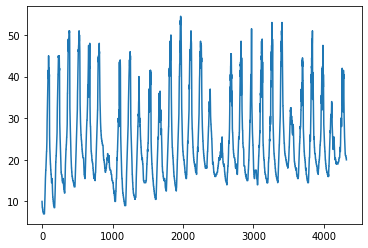

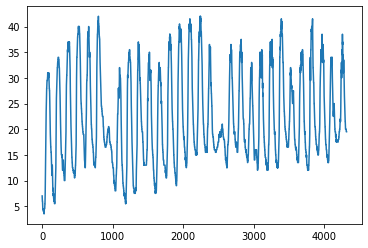

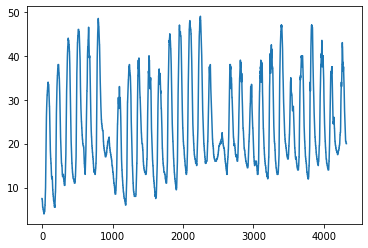

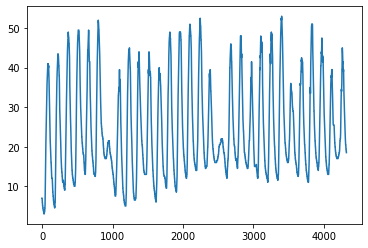

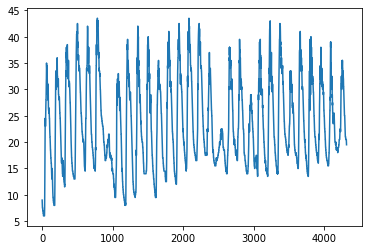

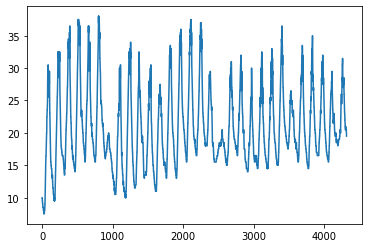

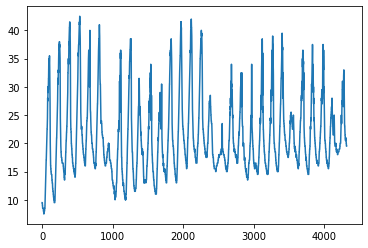

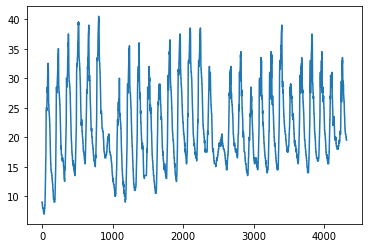

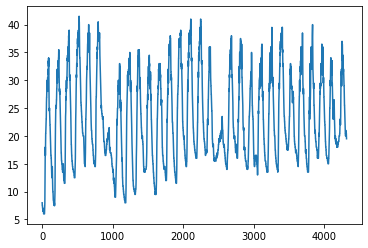

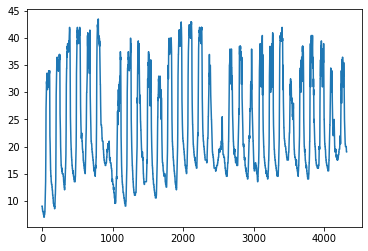

In [80]:
#target : Y00 ~ Y17
y=['Y00','Y01','Y02','Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
for i in range(18):
  plt.plot(train[y[i]][:4321])
  plt.show()

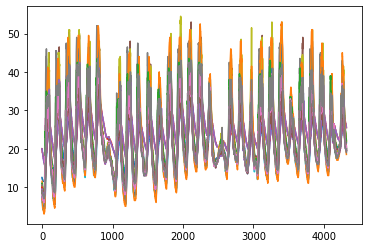

In [15]:
plt.plot(y_train)
plt.show()

## 시계열 데이터 딥러닝 모델참고 예제 <br>
- 나스닥100 주식 예측 : https://m.blog.naver.com/silvury/220939233742
- stacked LSTM : https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
- keras 참고 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 주택가격 예측 딥러닝 모델 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 시계열 예측에서의 LSTM : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

## 30일 데이터 사용 모델
1. DNN (mse : 18)
2. LSTM for regressor ( mse : 
4. stack LSTM
5. stacked LSTM with Memory based between batches
6. GRU

DNN

In [16]:
import pandas as pd
%tensorflow_version 1.x
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras

Using TensorFlow backend.


In [0]:
X_train = X_train.values #30일데이터
y_train = y_train.values

In [0]:
#normalize
sc = MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train)
y_test=sc.fit_transform(y_train)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [21]:
X_train.shape

(3888, 40)

In [22]:
y_train #확인 

array([[28.5, 36.5, 37.5, ..., 36.5, 39. , 42.5],
       [21.5, 24.5, 24.5, ..., 26.5, 29. , 29. ],
       [11.5,  9. ,  9. , ...,  8. ,  6.5,  8. ],
       ...,
       [18. , 18. , 17.5, ..., 17. , 17. , 17. ],
       [26.5, 33. , 32.5, ..., 28. , 35. , 35.5],
       [26. , 33.5, 32.5, ..., 28.5, 35.5, 34.5]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
#초기화 
keras.initializers.he_normal(seed=None) #randomnormal
clf = Sequential([
    Dense(15, kernel_initializer='uniform', input_dim=40, activation='elu'),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(25, kernel_initializer='uniform', activation='elu'),
    Dense(18, kernel_initializer='uniform', activation='elu'),
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                615       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                468       
Total params: 1,928
Trainable params: 1,928
Non-trainable params: 0
_________________________________________________________________


In [26]:
#학습
clf.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [27]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train, y_train, batch_size=15, epochs=2)




Epoch 1/2





3888/3888 [==============================] - 1s 233us/step - loss: 229.5878 - acc: 0.1330
Epoch 2/2
3888/3888 [==============================] - 0s 91us/step - loss: 34.3875 - acc: 0.1906


In [28]:
score = clf.evaluate(X_test, y_test, verbose=0)
print(clf.metrics_names[0])
print(score[0]) #mse

loss
18.615977393256294


LSTM for regression

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM
#import CallBack
%matplotlib inline

In [95]:
X_train.shape

(3888, 40)

In [0]:
#original : [samples, features] 
#LSTM data shape : [samples, time steps, features]
X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [97]:
X_train_reshape.shape

(3888, 1, 40)

In [0]:
model = Sequential() #lstm
model.add(LSTM(50, input_shape=(1, X_train_reshape.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(50,activation = "tanh"))
model.add(Dense(18))

In [0]:
#학습
model.compile(loss='mean_squared_error', optimizer='adam')

In [100]:
#visible 40 inputs, hidden layer with 4 LSTM blocks and output makes 18 prediction
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)


model.fit(X_train_reshape, y_train, epochs=100, batch_size=1, verbose=2, callbacks = [early_stop])

Epoch 1/100
 - 12s - loss: 51.5499
Epoch 2/100
 - 10s - loss: 8.7568
Epoch 3/100
 - 10s - loss: 7.1301
Epoch 4/100
 - 10s - loss: 5.4913
Epoch 5/100
 - 10s - loss: 4.9838
Epoch 6/100
 - 10s - loss: 4.5506
Epoch 7/100
 - 10s - loss: 4.2754
Epoch 8/100
 - 10s - loss: 4.2021
Epoch 9/100
 - 10s - loss: 3.9765
Epoch 10/100
 - 10s - loss: 3.8289
Epoch 11/100
 - 10s - loss: 3.7164
Epoch 12/100
 - 10s - loss: 3.6828
Epoch 13/100
 - 10s - loss: 3.5820
Epoch 14/100
 - 10s - loss: 3.4507
Epoch 15/100
 - 10s - loss: 3.4179
Epoch 16/100
 - 10s - loss: 3.3994
Epoch 17/100
 - 10s - loss: 3.2513
Epoch 18/100
 - 10s - loss: 3.2572
Epoch 19/100
 - 10s - loss: 3.2054
Epoch 20/100
 - 10s - loss: 3.1826
Epoch 21/100
 - 10s - loss: 3.1364
Epoch 22/100
 - 10s - loss: 3.1320
Epoch 23/100
 - 10s - loss: 3.0887
Epoch 24/100
 - 10s - loss: 3.0564
Epoch 25/100
 - 10s - loss: 3.0430
Epoch 26/100
 - 10s - loss: 3.0007
Epoch 27/100
 - 10s - loss: 2.9899
Epoch 28/100
 - 10s - loss: 2.9870
Epoch 29/100
 - 10s - loss: 

In [0]:
# make predictions
trainPredict = model.predict(X_train_reshape)
testPredict = model.predict(X_test_reshape)

In [0]:
trainPredict = sc.inverse_transform(trainPredict)

In [0]:
testPredict = sc.inverse_transform(testPredict)

In [0]:
trainY = sc.inverse_transform(y_train)
testY = sc.inverse_transform(y_test)

In [50]:
len(trainPredict)

3888

In [51]:
import math
from sklearn.metrics import mean_squared_error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 59.84 RMSE
Test Score: 61.81 RMSE


## stacked LSTM with MeMory Between Batches

In [0]:
batch_size = 1
look_back = 40

In [85]:
X_train.shape

(3888, 40)

In [0]:
#data shape
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
testX = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [87]:
testX.shape

(432, 40, 1)

In [0]:
model = Sequential()
model.add(LSTM(30, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(30))
model.add(Dropout(0.3))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(18))

In [0]:
#학습
model.compile(loss='mean_squared_error', optimizer='adam')

```python
for i in range(10):
	model.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
```

전이학습 : LSTM for regression

In [0]:
from keras.models import load_model
model.save('LSTM_1_0307.h5') #0307

In [0]:
model = load_model('LSTM_1_0307.h5')

In [0]:
model2 = Sequential()

for layer in model.layers[:-1]:
    model2.add(layer)
    
#freeze the layers
for layer in model2.layers:
    layer.trainable = False
    
model2.add(Dense(1))
model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [104]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 50)                18200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 20,801
Trainable params: 51
Non-trainable params: 20,750
_________________________________________________________________


In [0]:
# 3일 데이터 
X18_train = train_all[4321:]
Y18_train = train['Y18'][4321:]

In [0]:
Y18_train = Y18_train.values
X18_train = X18_train.values

In [0]:
X18_train_reshape = np.reshape(X18_train, (X18_train.shape[0], 1, X18_train.shape[1]))

In [118]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

model2.fit(X18_train_reshape,Y18_train, epochs = 800, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

Train on 344 samples, validate on 87 samples
Epoch 1/800
 - 3s - loss: 819.5414 - val_loss: 1089.0718
Epoch 2/800
 - 0s - loss: 796.2204 - val_loss: 1058.6894
Epoch 3/800
 - 0s - loss: 774.7041 - val_loss: 1028.7556
Epoch 4/800
 - 0s - loss: 749.6445 - val_loss: 999.3846
Epoch 5/800
 - 0s - loss: 728.0063 - val_loss: 970.8166
Epoch 6/800
 - 0s - loss: 702.6704 - val_loss: 942.8161
Epoch 7/800
 - 0s - loss: 684.0969 - val_loss: 915.7074
Epoch 8/800
 - 0s - loss: 662.5488 - val_loss: 889.2251
Epoch 9/800
 - 0s - loss: 641.7227 - val_loss: 863.4034
Epoch 10/800
 - 0s - loss: 622.9404 - val_loss: 838.4932
Epoch 11/800
 - 0s - loss: 606.6681 - val_loss: 814.0269
Epoch 12/800
 - 0s - loss: 583.9487 - val_loss: 790.1847
Epoch 13/800
 - 0s - loss: 569.1148 - val_loss: 766.8535
Epoch 14/800
 - 0s - loss: 550.9650 - val_loss: 744.1678
Epoch 15/800
 - 0s - loss: 533.4816 - val_loss: 722.1068
Epoch 16/800
 - 0s - loss: 516.7476 - val_loss: 700.5098
Epoch 17/800
 - 0s - loss: 499.1664 - val_loss: 6

In [0]:
sub_test = pd.read_csv("test.csv") #적용할 데이터 
sub_test = sub_test.drop(['id'], axis=1)

In [179]:
sub_test.shape

(11520, 40)

In [136]:
sub_test.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
1,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
2,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
3,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,0.0,153.5,0.0,54.9,0.4,0.0,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,0.0,173.8,0.0,48.8,0.8,0.0,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


In [0]:
sub_test = sub_test.values

In [0]:
sub_reshape = np.reshape(sub_test, (sub_test.shape[0], 1, sub_test.shape[1]))

In [0]:
pred = model2.predict(sub_reshape)

In [0]:
df=pd.DataFrame(pred)

In [0]:
df = df.round(3)

In [174]:
df.head()

,0
0,22.693001
1,23.018000
2,20.981001
3,22.693001
4,22.693001


In [0]:
df.to_csv("prediction_LSTM_2.csv")

In [0]:
#mse
sub=pd.read_csv('prediction_LSTM_2.csv')

In [177]:
sub.head()

,Unnamed: 0,0
0,0,22.693
1,1,23.018
2,2,20.981
3,3,22.693
4,4,22.693


In [0]:
def mse_AIFrenz(y_true, y_pred):
    '''
    y_true: 실제 값
    y_pred: 예측 값
    '''
    diff = abs(y_true - y_pred)
    
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return score

In [178]:
df.shape

(11520, 1)